In [6]:
import requests
import os 

params = {
    "text_url": '',
    "data_path": ''
}

def get_info(url, show=False):
    try:
        if show == True:
            print("[get_info]::URL: ",url)
        r=requests.get(url)
    except requests.exceptions.RequestException as e:
        print("RequestException:: '"+e+"'")
        r = None
    except Exception as e:
        print("Exception:: '"+e+"'")
        r = None
    else:
        if show == True:
            print("Status code:",r.status_code)
            print("Headers:    ",r.headers)
            print("Content:    ",r.content)
        if r.status_code != 200:
            print("\nError getting file from URL:")
            print("Status code:",r.status_code)
            print("Reason:     ",r.reason)
            r = None
    finally:
        return r

def extract_filename_from_url(url):
    filename = url.split('/')[-1]
    return filename

def define_filename(data_path, text_filename):
    filename=os.path.join(os.getcwd(),data_path+text_filename)
    
    return filename

def wget(r, filename):
    try:
        with open(filename,'wb') as f:
            f.write(r.content)
    except IOError:
        print("'"+filename+"':: IO Error")
        filename = None
    except:
        print("'"+filename+"':: Unknown Error")
        filename = None
    finally:    
        return filename

def cat(filename):
    print("\n'"+filename+"' content:")
    try:
        with open(filename,'r') as f:
            print(f.read())
    except FileNotFoundError:
        print("'"+filename+"':: File not found")
    except IOError:
        print("'"+filename+"':: IO Error")
    except:
        print("'"+filename+"':: Unknown Error")

def execHTML(params, show=False):
    r = get_info(params["text_url"], show)
    if r != None:
        filename = wget(r, define_filename(params["data_path"], extract_filename_from_url(params["text_url"])))
        if show == True:
            if filename != None:
                cat(filename)
            else:
                print("\nExecution Error!")
        else:
            return filename
    else:
        print("\nExecution Error!")

    return None

def show_image(filename):
    from PIL import Image
    from IPython.display import IFrame
    try:
        img = Image.open(filename)
        display(img)
        return True
    except Exception as e:
        print (e)
        return False

def show_url_image(url):
    params["text_url"] = url
    params["data_path"] = "resources/images/"
    filename = execHTML(params)
    
    return show_image(filename)


Patricia Allen   patricia.allen@example.com
Picture: https://randomuser.me/api/portraits/women/2.jpg


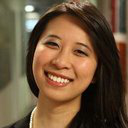

Yusuf Roger   yusuf.roger@example.com
Picture: https://randomuser.me/api/portraits/men/40.jpg


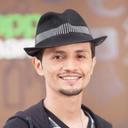

Noah Robinson   noah.robinson@example.com
Picture: https://randomuser.me/api/portraits/men/99.jpg


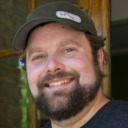

Barbara Alvarez   barbara.alvarez@example.com
Picture: https://randomuser.me/api/portraits/women/53.jpg


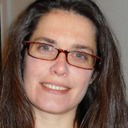

Elif Dalkıran   elif.dalkiran@example.com
Picture: https://randomuser.me/api/portraits/women/26.jpg


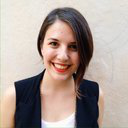

In [8]:
#TESTING

from randomuser import RandomUser
import pandas as pd

r = RandomUser()

some_list = r.generate_users(5)
for user in some_list:
    print (user.get_full_name()," ",user.get_email())
    
    url = user.get_picture()
    print ('Picture: '+url)

    # params["text_url"] = url
    # params["data_path"] = "resources/images/"
    # filename = execHTML(params)

    # show_image(filename)
    
    show_url_image(url)


In [1]:
import xml.etree.ElementTree as etree
import pandas as pd

def read_xml(xml_file, columns):
    tree = etree.parse(xml_file)
    root = tree.getroot()

    datatframe = pd.DataFrame(columns = columns)

    for node in root: 
        firstname = node.find("firstname").text
        lastname = node.find("lastname").text 
        title = node.find("title").text 
        division = node.find("division").text 
        building = node.find("building").text
        room = node.find("room").text

        datatframe = datatframe.append(pd.Series([firstname, lastname, title, division, building, room], index = columns), ignore_index = True)
    
    return datatframe

In [2]:
# TESTING

data_path ='resources/data/'
data_file = 'Sample-employee-XML-file.xml'

columns = ["firstname", "lastname", "title", "division", "building","room"]
df = read_xml(data_path+data_file, columns)
df

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,02
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


In [ ]:
# SAVE TO CSV AND JSON

df.to_csv(data_path+"employee.csv", index=False)
df.to_json(data_path+"employee.json", orient='records')